In [41]:
import pandas as pd
import numpy as np

file_path = 'datasets/Uber/Uber.csv'
df = pd.read_csv(file_path, sep= ',')
df.columns = df.columns.str.strip() # data column에 있는 앞뒤 공백 제거
df.info() #df이 어떻게 이루어져있는지

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [42]:
#시계열이 있으면 시간데이터로 변형

df['START_DATE*'] = pd.to_datetime(df['START_DATE*'],errors = 'coerce')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'],errors = 'coerce')

In [43]:
# 원하는 데이터로 오름차순하여 무슨 값이 있는지 대충 확인하기
df = df.sort_values(['START_DATE*','END_DATE*'])
df['START_DATE*'].unique()

<DatetimeArray>
['2016-01-01 21:11:00', '2016-01-02 01:25:00', '2016-01-02 20:25:00',
 '2016-01-05 17:31:00', '2016-01-06 14:42:00', '2016-01-06 17:15:00',
 '2016-01-06 17:30:00', '2016-01-07 13:27:00', '2016-01-10 08:05:00',
 '2016-01-10 12:17:00',
 ...
 '2016-12-30 11:31:00', '2016-12-30 15:41:00', '2016-12-30 16:45:00',
 '2016-12-30 23:06:00', '2016-12-31 01:07:00', '2016-12-31 13:24:00',
 '2016-12-31 15:03:00', '2016-12-31 21:32:00', '2016-12-31 22:08:00',
                 'NaT']
Length: 1155, dtype: datetime64[ns]

In [44]:
#결측치 한번에 보고 이상한거 있으면 다시 확인
column_name = df.columns
for i in column_name:
   empty = df[i].isna().sum()     #isna는 bull값인데 결국 True는 1이므로 합하면 없는값 갯수임
   print(f'{i} 컬럼의 결측값 갯수는 {empty}개 입니다')

START_DATE* 컬럼의 결측값 갯수는 1개 입니다
END_DATE* 컬럼의 결측값 갯수는 1개 입니다
CATEGORY* 컬럼의 결측값 갯수는 1개 입니다
START* 컬럼의 결측값 갯수는 1개 입니다
STOP* 컬럼의 결측값 갯수는 1개 입니다
MILES* 컬럼의 결측값 갯수는 0개 입니다
PURPOSE* 컬럼의 결측값 갯수는 503개 입니다


In [45]:
#위에 결측치가 있었으니 뭔지 한번보자

df_empty = df[df['START_DATE*'].isna()]
print(df_empty)



     START_DATE* END_DATE* CATEGORY* START* STOP*   MILES* PURPOSE*
1155         NaT       NaT       NaN    NaN   NaN  12204.7      NaN


In [46]:
# 1155번째 줄에 결측값이 있는데 뭔가 이상하다
df = df.drop(1155)
print(df)

             START_DATE*           END_DATE* CATEGORY*            START*  \
0    2016-01-01 21:11:00 2016-01-01 21:17:00  Business       Fort Pierce   
1    2016-01-02 01:25:00 2016-01-02 01:37:00  Business       Fort Pierce   
2    2016-01-02 20:25:00 2016-01-02 20:38:00  Business       Fort Pierce   
3    2016-01-05 17:31:00 2016-01-05 17:45:00  Business       Fort Pierce   
4    2016-01-06 14:42:00 2016-01-06 15:49:00  Business       Fort Pierce   
...                  ...                 ...       ...               ...   
1150 2016-12-31 01:07:00 2016-12-31 01:14:00  Business           Kar?chi   
1151 2016-12-31 13:24:00 2016-12-31 13:42:00  Business           Kar?chi   
1152 2016-12-31 15:03:00 2016-12-31 15:38:00  Business  Unknown Location   
1153 2016-12-31 21:32:00 2016-12-31 21:50:00  Business        Katunayake   
1154 2016-12-31 22:08:00 2016-12-31 23:51:00  Business           Gampaha   

                 STOP*  MILES*         PURPOSE*  
0          Fort Pierce     5.1   Meal

In [47]:
# 숫자인 열에 대해서 describe하면 분위값도 구해줌
df['MILES*'].describe()


count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES*, dtype: float64

In [48]:

df['PURPOSE*'].describe()

count         653
unique         10
top       Meeting
freq          187
Name: PURPOSE*, dtype: object

In [49]:
#dt.total_seconds를 사용하면 초단위로 나타낼 수 있고 이걸 60으로 나눠서 분단위로 표현할 수 있음
df['DURATION*'] = (df['END_DATE*']-df['START_DATE*']).dt.total_seconds()/60
df['DURATION*']

0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1150      7.0
1151     18.0
1152     35.0
1153     18.0
1154    103.0
Name: DURATION*, Length: 1155, dtype: float64

In [50]:
#30%와 90% 사분위를 구하는 방법
df['MILES*'].quantile([0.3,0.75, 0.9])

0.30     3.20
0.75    10.40
0.90    17.06
Name: MILES*, dtype: float64

Text(0.5, 1.0, 'miles vs duration')

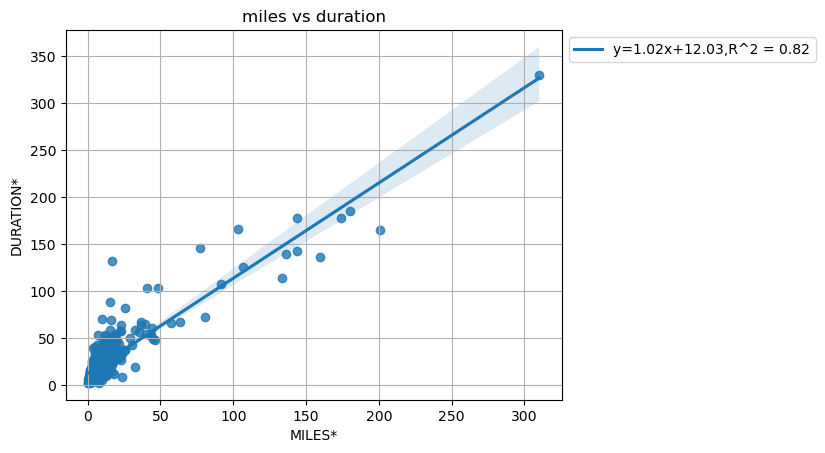

In [51]:
#선형회귀 계산 57페이지
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

df = df.dropna()
s,i,r,_,_ = linregress(df['MILES*'],df['DURATION*'])

fig, ax = plt.subplots()
sns.regplot(x = 'MILES*',y = 'DURATION*', data = df, ax = ax, line_kws = {'label' : 'y={:.2f}x+{:.2f},R^2 = {:.2f}'.format(s,i,r**2)})

ax.legend(bbox_to_anchor = (1,1),loc = 'upper left')
ax.grid(True)
ax.set_title('miles vs duration')

In [52]:
print(s,i,r,_,_) #y절편, x절편, r값

1.0154102978084691 12.029298974981195 0.9057424296726834 0.018622439773832617 0.018622439773832617


In [53]:
print(df)

             START_DATE*           END_DATE* CATEGORY*            START*  \
0    2016-01-01 21:11:00 2016-01-01 21:17:00  Business       Fort Pierce   
2    2016-01-02 20:25:00 2016-01-02 20:38:00  Business       Fort Pierce   
3    2016-01-05 17:31:00 2016-01-05 17:45:00  Business       Fort Pierce   
4    2016-01-06 14:42:00 2016-01-06 15:49:00  Business       Fort Pierce   
5    2016-01-06 17:15:00 2016-01-06 17:19:00  Business   West Palm Beach   
...                  ...                 ...       ...               ...   
1150 2016-12-31 01:07:00 2016-12-31 01:14:00  Business           Kar?chi   
1151 2016-12-31 13:24:00 2016-12-31 13:42:00  Business           Kar?chi   
1152 2016-12-31 15:03:00 2016-12-31 15:38:00  Business  Unknown Location   
1153 2016-12-31 21:32:00 2016-12-31 21:50:00  Business        Katunayake   
1154 2016-12-31 22:08:00 2016-12-31 23:51:00  Business           Gampaha   

                 STOP*  MILES*         PURPOSE*  DURATION*  
0          Fort Pierce    